In [1]:
import numpy as np
import math
from scipy import special as sp
import matplotlib.pyplot as plt

def qfunc(x):
    return 0.5-0.5*sp.erf(x/math.sqrt(2))
  
def transform_dB(SNR):
  return 10**(SNR / 10)

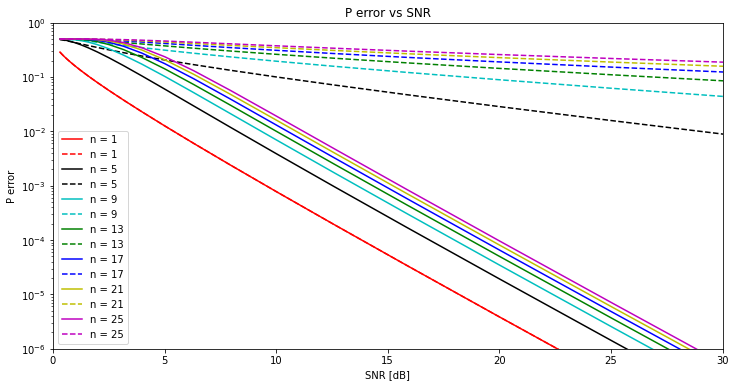

In [2]:
from scipy.stats import norm

n_values = [1, 29]
SNR_values = [-5, 30]
p_err_dig_results = []
p_err_an_results = []

#fig, axs = plt.subplots(2, 3, figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel('SNR [dB]')
ax.set_ylabel('P error') 
ax.set_title('P error vs SNR')
ax.set_yscale('log')
ax.set_ylim(10**-6, 1)
ax.set_xlim(0, 30)

i = 0
j = 0
colors = ['r', 'k', 'c', 'g', 'b', 'y', 'm']
for n in range(n_values[0], n_values[1], 4):
  for SNR in range(SNR_values[0], SNR_values[1]):
    p_err_dig = 1/2 * (1 - (1 - 2*qfunc(math.sqrt(transform_dB(SNR))))**n)
    p_err_dig_results.append(p_err_dig)

    #print("SNR: " + str(transform_dB(SNR)))
    #print("1-phi(sqrt(SNR)): " + str(1 - norm.cdf(math.sqrt(transform_dB(SNR)))))
    rho = transform_dB(SNR)**n / ((transform_dB(SNR) + 1)**n - transform_dB(SNR)**n)
    p_err_an = 1 - norm.cdf(math.sqrt(rho))
    #print("Probability of error: " + str(p_err_an))
    p_err_an_results.append(p_err_an)

  x_vals = [transform_dB(x) for x in range(SNR_values[0], SNR_values[1])]
  ax.plot(x_vals, p_err_dig_results, color = colors[i], label='n = ' + str(n))
  ax.plot(x_vals, p_err_an_results, linestyle="--", color = colors[i], label='n = ' + str(n))
  ax.legend()
  p_err_dig_results = []
  p_err_an_results = []
  i += 1

  # multi-plot
  #x_vals = [x for x in range(SNR_values[0], SNR_values[1])]
  #cur_axs = axs[i % 2, j % 3]
  #cur_axs.plot(x_vals, p_err_results, color='r', label='n = ' + str(n))
  #cur_axs.set_xlabel('SNR')
  #cur_axs.set_ylabel('P error') 
  #cur_axs.set_title('P error vs SNR, n = ' + str(n))
  #cur_axs.legend() 

  #if i % 2 != 0:
  #  j += 1
  #i += 1
  
  #p_err_results = []

In [3]:
from math import sqrt
def repetidor_digital(Y,A):
  return -A if Y < 0 else A

def ber(A):
  return -A if np.random.uniform() < 0.5 else A

## Def de parametros
A=1;                 # amplitud
h=0.5;               # atenuacion
iteraciones=100000;     # Iteraciones
cant_rep=9;          # Cantidad de repetidores
error=0;             # error
 
sdb_values = [5, 25]
error_prob = []
error_prob_teorico = []
## Rep Digital
for i in range(sdb_values[0], sdb_values[1]):
  SNR = 10**(i/10)
  #G_h = sqrt(SNR / (SNR + 1))
  sigma=(A*h)/(sqrt(SNR)); # este sigma no estoy seguro 

  for j in range(iteraciones):
    X1 = ber(A)
    X = X1
    for k in range(cant_rep):
      W = np.random.normal(0, sigma)
      Y = h*X+W
      X = repetidor_digital(Y,A)
    
    if 	X != X1: 
        error += 1
   
  error_prob.append(error/iteraciones)
  error = 0

for i in range(sdb_values[0], sdb_values[1]):
  SNR=10**(i/10);
  error_prob_teorico.append(1/2 * (1 - (1 - 2*qfunc(sqrt(SNR)))**cant_rep))

Error muestral: [0.25354, 0.17349, 0.10318, 0.05259, 0.02175, 0.00692, 0.00182, 0.00028, 3e-05, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Error teorico: [0.2529796953139024, 0.17277469694925823, 0.10252147090224423, 0.05151512707262468, 0.021305149487773678, 0.007000362178896324, 0.0017431623136450747, 0.0003086389081177199, 3.572210123303776e-05, 2.425628075786168e-06, 8.424935366013742e-08, 1.259124804420253e-09, 6.512290706695012e-12, 8.992806499463768e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Diferencia entre muestral y teorico: [0.0005603046860975791, 0.0007153030507417724, 0.0006585290977557667, 0.00107487292737532, 0.0004448505122263205, 8.036217889632446e-05, 7.683768635492532e-05, 2.8638908117719904e-05, 5.722101233037761e-06, 7.574371924213833e-06, 8.424935366013742e-08, 1.259124804420253e-09, 6.512290706695012e-12, 8.992806499463768e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


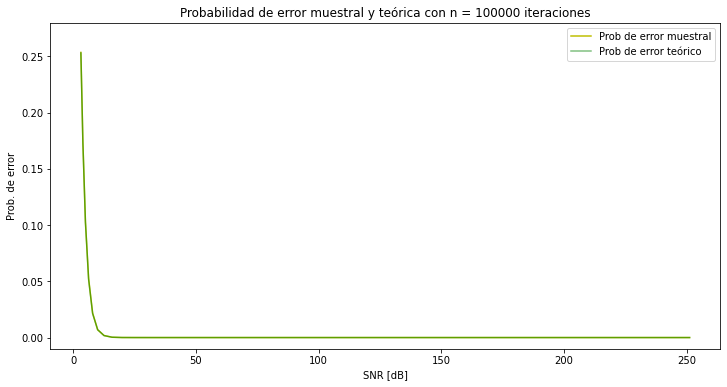

In [4]:
print("Error muestral: " + str(error_prob))
print("Error teorico: " + str(error_prob_teorico))

print("Diferencia entre muestral y teorico: " + str([abs(error_prob[i] - error_prob_teorico[i]) for i in range(len(error_prob))]))

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(-0.01, 0.28)
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('Prob. de error')
ax.set_title('Probabilidad de error muestral y teórica con n = ' + str(iteraciones) + ' iteraciones')

ax.plot([transform_dB(x) for x in range(sdb_values[0], sdb_values[1])], error_prob, label = 'Prob de error muestral', color = 'y', alpha = 1)
ax.plot([transform_dB(x) for x in range(sdb_values[0], sdb_values[1])], error_prob_teorico, label = 'Prob de error teórico', color = 'g', alpha = 0.5)
ax.legend();

In [5]:
def repetidor_analogico(X, sigma, h, G):
      W = np.random.normal(0, sigma)
      Y = h*X+W
      return G*Y

A=1;                 # amplitud
h=0.5;               # atenuacion
iteraciones=100000;  # Iteraciones
cant_rep=9;          # Cantidad de repetidores
error=0;     


sdb_values = [5, 25]
error_prob = []
error_prob_teorico = []

Y_vals_by_snr_A = [[] for i in range(sdb_values[0], sdb_values[1])]
Y_vals_by_snr_minus_A = [[] for i in range(sdb_values[0], sdb_values[1])]
Y_vals_variance = []
Y_vals_mean_A = []
Y_vals_mean_minus_A = []

## Rep Analogico
for i in range(sdb_values[0], sdb_values[1]):
  SNR = 10**(i/10)
  #G_h = sqrt(SNR / (SNR + 1))
  G = 1/h * sqrt(SNR/(SNR+1));
  sigma=(A*h)/(sqrt(SNR)); 

  Y_vals_A = []
  Y_vals_minus_A = []
  for j in range(iteraciones):
    X1 = ber(A)
    X = X1
    for k in range(cant_rep):
      X = repetidor_analogico(X,sigma,h,G)
  
    W = np.random.normal(0, sigma)
    Y = h*X + W

    if X1 == A:
      Y_vals_A.append(Y)
    else:
      Y_vals_minus_A.append(Y)
    
    X = -A if Y < 0 else A

    if 	X != X1: 
        error += 1
   
  var_yn = sigma**2 * ( ((h*G)**(2*n) - 1) / ((h*G)**2 - 1) )
  mu_yn = h * ((h*G)**(n-1)) * A
  Y_vals_by_snr_A[i-5] = Y_vals_A
  Y_vals_by_snr_minus_A[i-5] = Y_vals_minus_A
  
  Y_vals_variance.append(var_yn)
  Y_vals_mean_A.append(mu_yn)
  Y_vals_mean_minus_A.append(-mu_yn)

  error_prob.append(error/iteraciones)
  error = 0

for i in range(sdb_values[0], sdb_values[1]):
  SNR=10**(i/10);
  rho = SNR**cant_rep / ((SNR + 1)**cant_rep - SNR**cant_rep)
  error_prob_teorico.append(1 - norm.cdf(math.sqrt(rho)))

print(error_prob)
print(error_prob_teorico)

[0.39553, 0.36457, 0.32894, 0.29197, 0.25335, 0.2143, 0.17544, 0.13827, 0.1037, 0.07208, 0.04815, 0.02993, 0.01611, 0.00809, 0.00322, 0.00097, 0.00026, 4e-05, 1e-05, 0.0]
[0.38075871903545366, 0.3476056277463091, 0.3115768570869587, 0.27356047302016917, 0.23449951783843614, 0.19540739919045125, 0.15738752099650177, 0.12162671926006707, 0.08933690469666633, 0.0616300910402392, 0.03933350299099947, 0.022786203142419748, 0.01169753831409226, 0.0051628155521763475, 0.001885738559153305, 0.0005432488923661216, 0.00011617815166664602, 1.7088335779624764e-05, 1.5701727903438822e-06, 7.984334149391259e-08]


Error muestral: [0.39553, 0.36457, 0.32894, 0.29197, 0.25335, 0.2143, 0.17544, 0.13827, 0.1037, 0.07208, 0.04815, 0.02993, 0.01611, 0.00809, 0.00322, 0.00097, 0.00026, 4e-05, 1e-05, 0.0]
Error teorico: [0.38075871903545366, 0.3476056277463091, 0.3115768570869587, 0.27356047302016917, 0.23449951783843614, 0.19540739919045125, 0.15738752099650177, 0.12162671926006707, 0.08933690469666633, 0.0616300910402392, 0.03933350299099947, 0.022786203142419748, 0.01169753831409226, 0.0051628155521763475, 0.001885738559153305, 0.0005432488923661216, 0.00011617815166664602, 1.7088335779624764e-05, 1.5701727903438822e-06, 7.984334149391259e-08]
Diferencia entre muestral y teorico: [0.01477128096454633, 0.016964372253690907, 0.017363142913041307, 0.018409526979830837, 0.018850482161563875, 0.018892600809548743, 0.01805247900349824, 0.01664328073993293, 0.01436309530333367, 0.010449908959760806, 0.008816497009000529, 0.007143796857580251, 0.00441246168590774, 0.0029271844478236525, 0.0013342614408466953

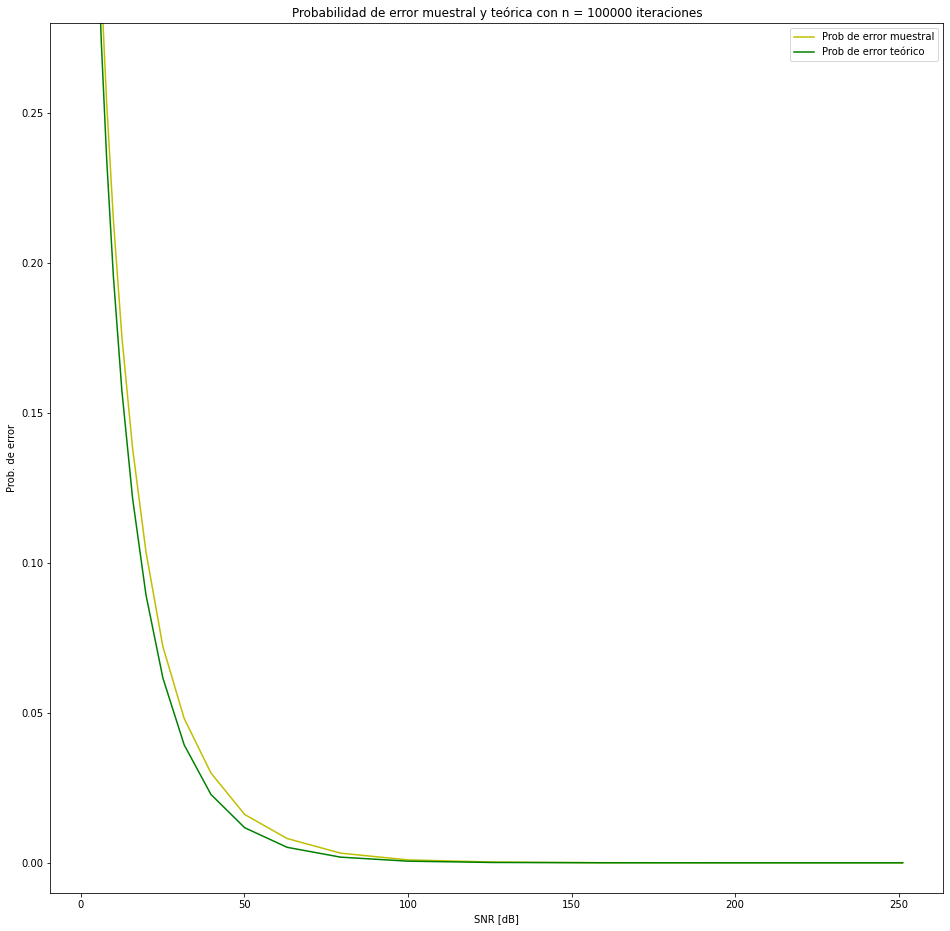

In [6]:
print("Error muestral: " + str(error_prob))
print("Error teorico: " + str(error_prob_teorico))

print("Diferencia entre muestral y teorico: " + str([abs(error_prob[i] - error_prob_teorico[i]) for i in range(len(error_prob))]))

fig, ax = plt.subplots(figsize=(16,16))
ax.set_ylim(-0.01, 0.28)
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('Prob. de error')
ax.set_title('Probabilidad de error muestral y teórica con n = ' + str(iteraciones) + ' iteraciones')

ax.plot([transform_dB(x) for x in range(sdb_values[0], sdb_values[1])], error_prob, label = 'Prob de error muestral', color = 'y')
ax.plot([transform_dB(x) for x in range(sdb_values[0], sdb_values[1])], error_prob_teorico, label = 'Prob de error teórico', color = 'g')
ax.legend();

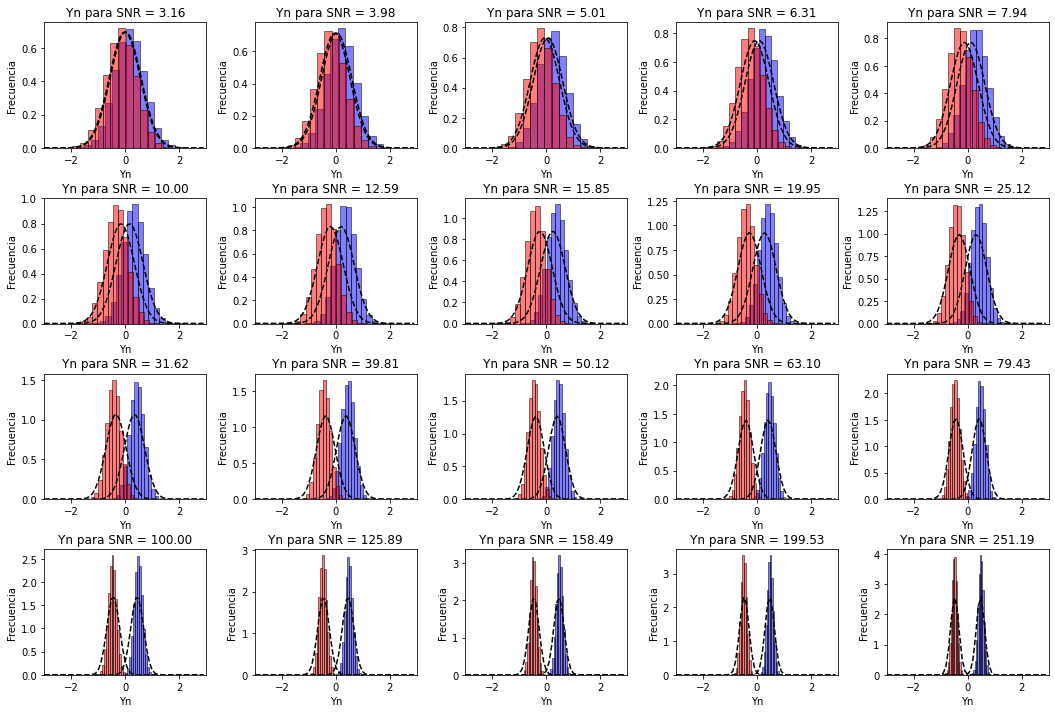

In [8]:
from scipy.stats import norm
fig, axs = plt.subplots(4, 5, figsize=(18,12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

snr_all_values = [snr for snr in range(sdb_values[0], sdb_values[1])]
k = 0
for i in range(4):
  for j in range(5):
    #print("Building histogram: " + str(k+1))
    cur_axs = axs[i % 4, j % 5]
    
    y1 = norm.pdf(np.arange(-3, 3, 0.1), Y_vals_mean_A[k], sqrt(Y_vals_variance[k]))
    y2 = norm.pdf(np.arange(-3, 3, 0.1), Y_vals_mean_minus_A[k], sqrt(Y_vals_variance[k]))
    cur_axs.set_title('Yn para SNR = ' + str("{:.2f}".format(10**(snr_all_values[k]/10))))
    cur_axs.set_xlabel('Yn')
    cur_axs.set_ylabel('Frecuencia')
    cur_axs.hist(Y_vals_by_snr_A[k], bins = 'sturges', color = 'b', alpha=0.5, histtype='bar', ec='black', density = True);
    cur_axs.hist(Y_vals_by_snr_minus_A[k], bins = 'sturges', color = 'r', alpha=0.5, histtype='bar', ec='black', density = True);
    #cur_axs.hist([Y_vals_by_snr_A[k], Y_vals_by_snr_minus_A[k]], bins = 'sturges', color = ['b', 'r'], alpha=0.5, histtype='bar', ec='black', density = True);
    cur_axs.plot(np.arange(-3, 3, 0.1), y1, color = 'k', linestyle='--')
    cur_axs.plot(np.arange(-3, 3, 0.1), y2, color = 'k', linestyle='--')

    cur_axs.set_xlim(-3, 3);

    k += 1